In [105]:
%matplotlib inline
# Dependencies
import tweepy
import warnings
warnings.simplefilter('ignore')

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import numpy as np

import matplotlib.dates as mdates


In [77]:
# Target users BBC, CBS, CNN, Fox, and New York times
target_users = ['@BBCWorld', "@CBSNews", "@CNN", "@nytimes", "@FoxNews"]

# results_list = []

# Initialize lists for sentiment results
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
user_list = []
twt_id_list = []
twt_ago_list = []
date_list = []

# Looping through target users
for user in target_users:
    
    # Initialize the oldest tweet variable
    oldest_tweet = None
    counter = 1
        
    # Loop through tweet pages
    for x in range(1):
        
        # Grab the tweets
        public_tweets = api.user_timeline(user,
                                         count = 100,
                                         result_type="recent",
                                         max_id = oldest_tweet)
        
        # Loop through the tweets
        for twt in public_tweets:
            
            # Run sentiment analysis
            results = analyzer.polarity_scores(twt["text"])
            
            # fill the lists
            compound_list.append(results['compound'])
            positive_list.append(results['pos'])
            negative_list.append(results['neg'])
            neutral_list.append(results['neu'])
            user_list.append(user)
            twt_id_list.append(twt['id'])
            date_list.append(datetime.strptime(twt['created_at'], "%a %b %d %H:%M:%S %z %Y"))
            
            # Register the "tweets ago" value and increment the counter
            twt_ago_list.append(counter)
            counter += 1
            
            # Actualize the oldest tweet value
            oldest_tweet = twt["id"] - 1


In [98]:
# Create a DataFrame
df = pd.DataFrame({"UserName": user_list,
                   "Tweets ago": twt_ago_list,
                   "Date": date_list,
                   "Tweet ID" : twt_id_list,
                   "Compound": compound_list,
                  "Positive": positive_list,
                  "Negative": negative_list,
                  "Neutral": neutral_list,
                    })

df
# df.count()

,UserName,Tweets ago,Date,Tweet ID,Compound,Positive,Negative,Neutral
0,@BBCWorld,1,2018-10-07 17:05:38+00:00,1048982695748030464,-0.3612,0.000,0.238,0.762
1,@BBCWorld,2,2018-10-07 16:42:28+00:00,1048976864482664448,0.0000,0.000,0.000,1.000
2,@BBCWorld,3,2018-10-07 16:14:08+00:00,1048969737366118400,-0.7906,0.000,0.467,0.533
3,@BBCWorld,4,2018-10-07 15:25:50+00:00,1048957582294044673,-0.8126,0.000,0.583,0.417
4,@BBCWorld,5,2018-10-07 15:05:46+00:00,1048952530229755907,0.0000,0.000,0.000,1.000
5,@BBCWorld,6,2018-10-07 14:41:29+00:00,1048946418591981568,0.0000,0.000,0.000,1.000
6,@BBCWorld,7,2018-10-07 14:22:33+00:00,1048941653426409472,0.5859,0.142,0.000,0.858
7,@BBCWorld,8,2018-10-07 14:00:24+00:00,1048936079536132096,0.0000,0.000,0.000,1.000
8,@BBCWorld,9,2018-10-07 13:57:06+00:00,1048935249294630913,-0.5423,0.000,0.310,0.690
9,@BBCWorld,10,2018-10-07 13:34:59+00:00,1048929685273567233,0.2585,0.107,0.070,0.822


In [115]:
# Save the results into a csv file
#---------------------------------
csv_file = os.path.join("plots","news_sentiment_analysis.csv")
df.to_csv(csv_file)


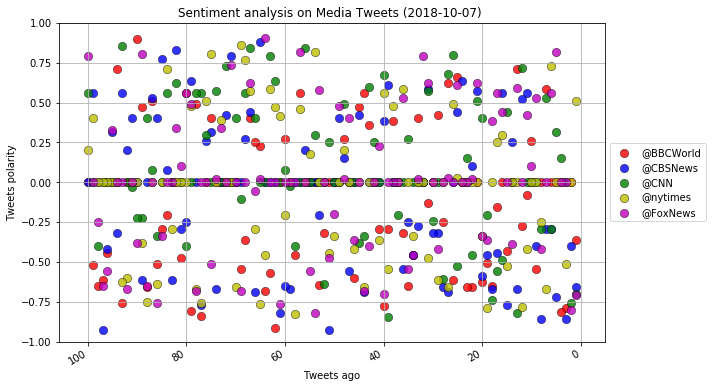

In [101]:
# Plot the results by the number of tweets ago
#---------------------------------------------
fig1_name = os.path.join("plots",'scatter_twt_sentiment.png')
# today's date to append in the title
now =datetime.now()
str_now = now.strftime("%Y-%m-%d")

plt.figure(figsize=(10, 6),facecolor="w")

plt.hold(True)

color_list = ["r","b","g","y","m"]
ii = 0
for user in target_users:
    xval = df.loc[df['UserName'] == user]['Tweets ago']
    yval = df.loc[df['UserName'] == user]['Compound']
    plt.scatter(xval, yval, 
                color=color_list[ii], 
                alpha=0.8, 
                edgecolor='k',
                linewidth=0.5,
                s = 70,
                label=user)
    
    ii += 1

plt.xlabel('Tweets ago')
plt.ylabel('Tweets polarity')
plt.title(f"Sentiment analysis on Media Tweets ({str_now}) ")

plt.legend()
ax = plt.gca()
ax.invert_xaxis()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.ylim(-1,1)
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.savefig(fig1_name)

plt.show()

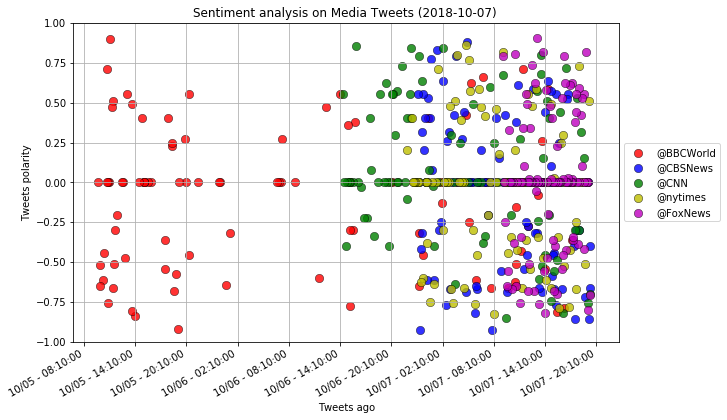

In [118]:
# Plot the results by date
#---------------------------------------------
fig1_name = os.path.join("plots",'scatter_twt_sentiment_time.png')

# today's date to append in the title
now =datetime.now()
str_now = now.strftime("%Y-%m-%d")

plt.figure(figsize=(10, 6),facecolor="w")

plt.hold(True)

color_list = ["r","b","g","y","m"]
ii = 0
for user in target_users:
    # Converting the datestamps to pydatetime to be able to plot with the dates
    xval = [ xx.to_pydatetime() for xx in  df.loc[df['UserName'] == user]['Date'] ]
    yval = df.loc[df['UserName'] == user]['Compound']
    plt.scatter(xval, yval, 
                color=color_list[ii], 
                alpha=0.8, 
                edgecolor='k',
                linewidth=0.5,
                s = 70,
                label=user)
    
    ii += 1

plt.xlabel('Tweets date')
plt.ylabel('Tweets polarity')
plt.title(f"Sentiment analysis on Media Tweets ({str_now}) ")

plt.legend()
ax = plt.gca()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Formating the xticks
myFmt = mdates.DateFormatter('%m/%d - %H:%m:%S')
ax.xaxis.set_major_formatter(myFmt)
plt.grid()
plt.ylim(-1,1)
plt.tight_layout()
plt.gcf().autofmt_xdate()
plt.savefig(fig1_name)

plt.show()



By plotting the sentiment values by date (and not by tweets ago) we notice the difference of tweet frequency between the news sources.

In [111]:
# xval = [ xx.to_pydatetime() for xx in  df.loc[df['UserName'] == user]['Date'] ]


# datetime(xval[0])


In [95]:
# bla = xval[0]

In [96]:
# bla.to_pydatetime()

datetime.datetime(2018, 10, 7, 17, 5, 38, tzinfo=datetime.timezone.utc)